<b>39. Аппроксимировать функцию $x = x(t)$ на промежутке $[-1; 1]$ двумя способами:
    
A. при помощи ортогональных многочленов Чебышёва 1 рода;

B. при помощи многочлена Тейлора (в точке $t_0 = 0$).

Число $n$ - заданный порядок аппроксимации. Построить графики функции $x$ и полученных аппроксимаций. Ответить на следующие вопросы, обосновав ответы численно:
- какой способ дает лучшую аппроксимацию вблизи нуля?
- какой способ дает лучшую равномерную аппроксимацию на промежутке $[-1; 1]$?</b>

$x(t) = t \exp{(-t^2)}, n = 3$

<i>A. Аппроксимация многочленами Чебышёва 1 рода.</i>

Многочлены Чебышёва 1 рода образуют ортогональный (после нормировки - ортонормированный) базис в гильбертовом пространстве $L^{2, \xi}(-1, 1), \xi(t) = \frac{1}{\sqrt{1 - t^2}}.$
Обозначим этот ортонормированный базис следующим образом:

$$\{T_0(t), T_1(t), T_2(t), \dots, T_k(t), \dots\}$$

In [37]:
import sympy as sp
from IPython.display import display, Latex

sp.init_printing(use_latex='mathjax')

t = sp.Symbol('t')
# Данные задачи
x = t*sp.exp(-t**2)
n = 3

# Найдем многочлены Чебышева 1 рода
basis = [1, t]
for i in range(2, n + 1):
    basis.append(2*t*basis[i - 1] - basis[i - 2])
    
display(basis)

⎡         2          ⎛   2    ⎞    ⎤
⎣1, t, 2⋅t  - 1, 2⋅t⋅⎝2⋅t  - 1⎠ - t⎦

Составим для функции $x$ частичную сумму ряда Фурье (3-го порядка) по системе многочленов Чебышёва 1 рода:

In [16]:
import scipy.integrate as integrate

cheb = 0

for i in range(n + 1):
    cheb += (integrate.quad(lambda z: ((x * basis[i])/(sp.sqrt(1 - t**2))).subs(t, z), -1, 1)[0])*basis[i]

Теперь предоставим графики этих функций:

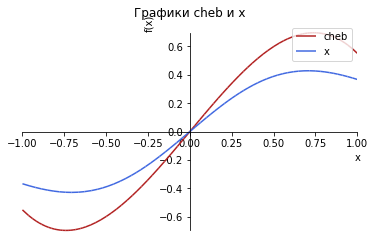

In [17]:
p = sp.plot((cheb, (t, -1, 1)), 
            (x, (t, -1, 1)),
            title='Графики cheb и x',
            show=False,
            legend=True)
p[0].line_color = 'firebrick'
p[0].label = 'cheb'
p[1].line_color = 'royalblue'
p[1].label = 'x'
p.show()

<i>B. Аппроксимация многочленом Тейлора.</i>

Составим для функции $x$ многочлен Тейлора 3-ей степени в точке $t_0 = 0$.



In [31]:
import math

def get_diff(func, amount):
    for i in range(amount):
        func = func.diff()
    return func

taylor = x.subs(t, 0)

for i in range(1, n + 1):
    taylor += (get_diff(x, i).subs(t, 0)*t**i)/(math.factorial(i))

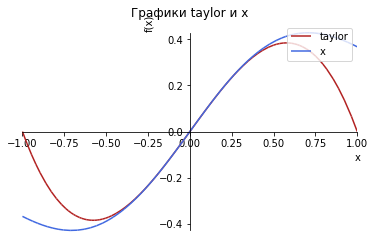

In [32]:
p = sp.plot((taylor, (t, -1, 1)), 
            (x, (t, -1, 1)),
            title='Графики taylor и x',
            show=False,
            legend=True)
p[0].line_color = 'firebrick'
p[0].label = 'taylor'
p[1].line_color = 'royalblue'
p[1].label = 'x'
p.show()

Чтобы оценить качество аппроксимации вблизи нуля, рассмотрим пробные точки $t = 0.2, t = 0.1$.

In [39]:
dots = [0.2, 0.1]

for i in dots:
    display(Latex("В точке t = " + str(i) + ", для Тейлора:"))
    display(sp.Abs(x.subs(t, i) - taylor.subs(t, i)))
    
    display(Latex("В точке t = " + str(i) + ", для Чебышева:"))
    display(sp.Abs(x.subs(t, i) - cheb.subs(t, i)))

<IPython.core.display.Latex object>

0.000157887830464637

<IPython.core.display.Latex object>

0.0836392967745682

<IPython.core.display.Latex object>

4.98337491680600e-6

<IPython.core.display.Latex object>

0.0414772939105331

Отсюда можно сделать вывод, что вблизи нуля значения многочлена Тейлора гораздо ближе к значениям функции $x$, чем значения аппроксимации многочленами Чебышёва.

Чтобы оценить качество равномерной аппроксимации на промежутке $[-1; 1]$, надо вычислить расстояния в метрике $C[-1; 1]$.

<IPython.core.display.Latex object>

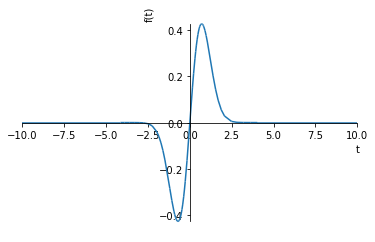

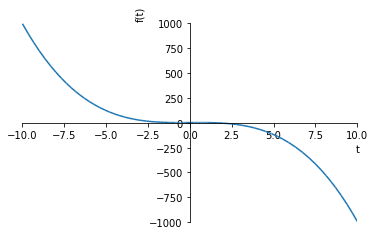

     fun: -0.36787288031168464
 message: 'Solution found.'
    nfev: 27
  status: 0
 success: True
       x: 0.99999598013623725

0.367872880311685

<IPython.core.display.Latex object>

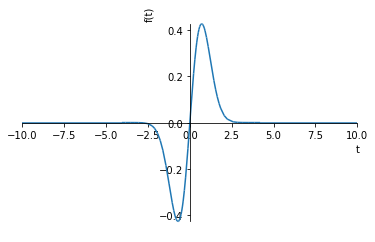

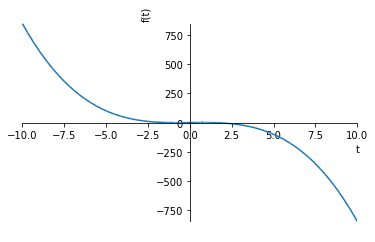

     fun: -0.26962107827888449
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: -0.76346400579251317

0.269621078278884

In [43]:
from scipy.optimize import minimize_scalar

# Метрика в пространстве C[-1; 1]
def dist(x1, x0):
    rho_func = sp.lambdify(t, sp.Abs(x1 - x0))
    res = minimize_scalar(lambda x: -rho_func(x), bounds=[-1,1], method='Bounded')
    return sp.Abs(x1 - x0).subs(t, res.x)

display(Latex("Расстояние для Тейлора:"))
display(dist(x, taylor))

display(Latex("Расстояние для Чебышева:"))
display(dist(x, cheb))

Итак, многочлены Чебышёва дают более точную равномерную аппроксимацию функции $x$ на промежутке $[-1; 1]$.